<a href="https://colab.research.google.com/github/25041001-cloud/Probabilidad/blob/main/Unidad1/Practica_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Probabilidad y estadistica

##Unidad 1

###Facilitador: José Gabriel Rodriguez Rivas

###Alumno: Luis Ángel Álvarez García

###**Programa 6:** **Estadística descriptiva del Dataset Autos**

##Cargamos el Dataset de Autos

In [6]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statistics import stdev

In [7]:
autos2=pd.read_csv("autos2.csv",encoding="ISO-8859-1")

###Verificamos que se haya importado de forma correcta

In [8]:
autos2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [9]:
autos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

##Calculamos maximo, minimo y medidas de tendencia central

##Precio máximo de la base de datos

In [10]:
maximo=autos2.price.max()
print(maximo)

45400.0


##Precio minimo de la base de datos

In [11]:
minimo=autos2.price.min()
print(minimo)

5118.0


##Moda del precio de los autos

In [12]:
moda=autos2.price.mode()
print(moda)

#Como hay muchas modas, se va usar .value_counts().idxmax() para obtener la moda principal

modaPrincipal=autos2.price.value_counts().idxmax()
print("La moda que se repite más veces es: ",modaPrincipal)

0      5572.0
1      6229.0
2      6692.0
3      7295.0
4      7609.0
5      7775.0
6      7898.0
7      7957.0
8      8495.0
9      8845.0
10     8921.0
11     9279.0
12    13499.0
13    16500.0
14    18150.0
Name: price, dtype: float64
La moda que se repite más veces es:  16500.0


##Media del precio de los autos

In [13]:
media=autos2.price.mean()
print(media)

13207.129353233831


##Mediana del precio de los autos

In [14]:
mediana=autos2.price.median()
print(mediana)

10295.0


##Desviación estandar de los precios

In [15]:
desviacion_estandar=autos2['price'].std()
print(desviacion_estandar)

7947.066341939271


###Obtencion de los estadísticos y cuartiles por medio de la función describe()

In [16]:
estadisticos=autos2['price'].describe()
print(estadisticos)

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64


##Creación de un histograma de precios de los autos

In [17]:
#Para poder determinar la cantidad óptima de bins en el histograma se debe usar la regla de Sturges
#que es k=log(base 2) de n, donde n es el numero de datos en la columna price y k el numero de bins
n=len(autos2['price'])
k=int(1+math.log2(n))
print("Valor de n=",n,"\nNúmero de intervalos=",k)

Valor de n= 205 
Número de intervalos= 8


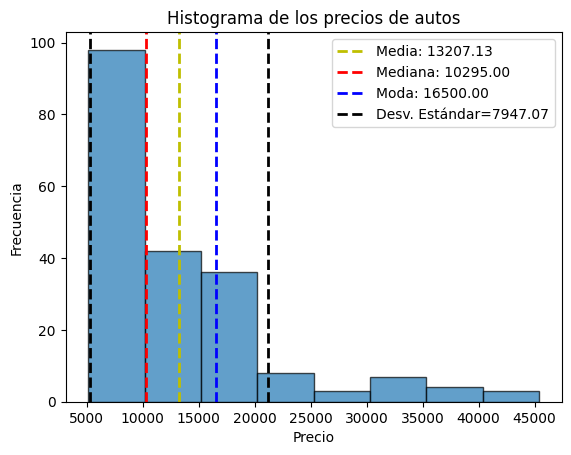

In [18]:
plt.hist(autos2['price'],bins=k,edgecolor='black',alpha=0.7)
plt.title("Histograma de los precios de autos")
plt.axvline(media,color='y',linestyle='dashed',linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana,color='r',linestyle='dashed',linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.axvline(modaPrincipal,color='b',linestyle='dashed',linewidth=2, label=f'Moda: {modaPrincipal:.2f}')
plt.axvline(media-desviacion_estandar, color='black', linestyle='dashed',
            linewidth=2, label=f'Desv. Estándar={desviacion_estandar:.2f}')
plt.axvline(media+desviacion_estandar, color='black', linestyle='dashed',
            linewidth=2)

#Nuevamente usamos la modaPrincipal obtenida previamente para poder graficarla
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

###Interpretación y conclusiones

Con el histograma terminado podemos ver que:

1.-La mayoría de precios se concentran entre los 5,000 y 10,000, lo que conlleva a que la mediana esté tan cerca de este sector

2.-Apesar de esto podemos ver que hay precios arriba de los 45,000, lo que eleva el valor del promedio

3.-De todos los precios repetidos el que más lo hace es 16,500

4.-También podemos observar que la desviación estandar abarca más del 50% de los datos, pues casi toda la concentración está dentro de esta

Con todo esto podemos concluir que la mayoría de los precios están entre 5,000 y 10,000, aunque hay autos aún más costosos

##Creación de un diagrama de caja y bigotes que demuestre la relación entre la columna del precio del automóvil y el tipo de vehículo

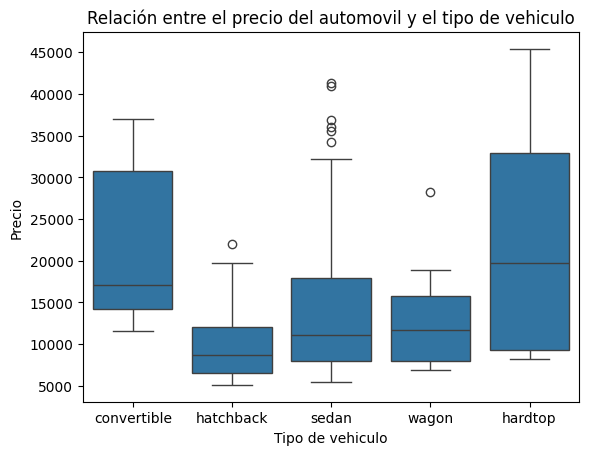

In [24]:
sns.boxplot(x='body-style',y='price',data=autos2)
plt.title("Relación entre el precio del automovil y el tipo de vehiculo")
plt.ylabel("Precio")
plt.xlabel("Tipo de vehiculo")
plt.show()

###Interpretación y conclusión

En este diagrama de caja podemos ver que:

1.-El tipo de vehiculo con ejemplares más caro es el hardtop, con más de 30,000, a este la siguen los convertibles; sin embargo los hardtop tambien tienen ejemplares relativamente baratos

2.-Los más baratos son los hatchback, pues,  casi todos sus ejemplares cuestan entre 7,000 a 13,000 aproximadamente

3.-En varios de los tipos podemos ver valores distintos a la mayoría, sobretodo en la tipo sedan, pues hay autos más caros que los convertibles

En conclusión, cada tipo de auto tiene costos diferentes de los otros, lo que afecta el diagrama, los hatchback muestran costos menores a los demás, y los tipo sedan muestran excepciones, con autos muy caros

##Creación de un diagrama de caja y bigotes que demuestre la relación entre la columna del precio del automóvil y el tipo de transmisión

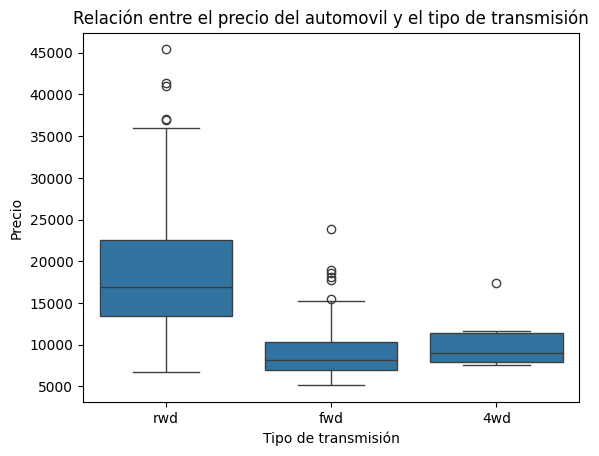

In [23]:
sns.boxplot(x='drive-wheels',y='price',data=autos2)
plt.title("Relación entre el precio del automovil y el tipo de transmisión")
plt.ylabel("Precio")
plt.xlabel("Tipo de transmisión")
plt.show()

###Interpretación y conclusión

Aquí podemos darnos cuenta de que:

1.-Las transmisiones tipo rwd (traseras) tienen una variación bastante notoria en comparación con las otras en cuanto a precios, pues abarcan practicamente todo el diagrama, incluso estando en autos que cuestan más de 45,000

2.-Las transmisiones 4wd (4x4) tienen menor variación que las demás en terminos de precios, además que están en autos más económicos que las traseras

3.-Las fwd (delanteras) tienen una variación relativamente pequeña, además de estar en los autos más económicos

Con este análisis podemos decir que, las transmisiones rwd están en autos más caros y tienen la varían más, mientras que las 4wd tienen menos variación.

##Creación de un diagrama de caja y bigotes que demuestre la relación entre la columna del precio del automóvil y la ubicación del motor

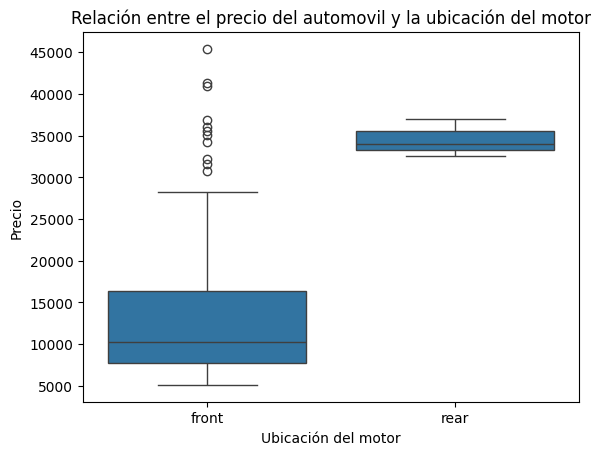

In [22]:
sns.boxplot(x='engine-location',y='price',data=autos2)
plt.title("Relación entre el precio del automovil y la ubicación del motor")
plt.ylabel("Precio")
plt.xlabel("Ubicación del motor")
plt.show()

###Interpretación y conclusión

Este diagrama nos muestra que:

1.-Los vehiculos con motor delantero son económicos, aunque presentan un rango de precio más amplio

2.-Mientras que los de motor trasero tienen menos variación y tenden a ser los más caros

Como conclusión, los vehiculos con motor delantero son los más usados en los automoviles registrados, mientras que los de motor trasero son los más caros en general y son menos empleados

#Conclusión general de la práctica

En base a mi experiencia al desarrollar esta práctica, puedo decir que, python es un muy buen lenguaje para el análisis de información en una base de datos (en este caso el libro de excel sobre automoviles), tambien que google colab es un servicio muy amigable con el usuario; además me parece que tanto las medidas de tendencia central, como los distintos diagramas (histogramas y diagramas de caja) son vitales para el analisis de grandes cantidades de datos, en lo personal me gustó más crear histogramas, pero no puedo negar la utilidad de los diagramas de caja pues permiten analizar ciertos porcentajes de los datos totales. Y también aprendí cosas nuevas, como los tipos de transmisión.
En cuanto a datos podemos ver que la mayoría de autos tienen costos relativamente bajos y esto se puede ver reflejado en sus características, pues los de mayor precio suelen ser de mejor calidad y emplear mecanismos más modernos, aunque hay muchas excepciones, que vendrían a ser casos concretos donde los vehículos son de muy alta gama